In [1]:
import json
import random
import pandas as pd

Loading metadata:

In [2]:
with open('../data/CaltechCameraTrapsSplits_v0.json') as json_file:
    recommend_train_val_splits = json.load(json_file)

In [3]:
with open('../data/caltech_images_20200316.json') as json_file:
    cct_metadata = json.load(json_file)
cct_images = pd.DataFrame(cct_metadata['images'])
cct_annotations = pd.DataFrame(cct_metadata['annotations'])

In [4]:
cct_images_labeled = pd.merge(cct_images,
                              cct_annotations,
                              how='outer',
                              left_on='id',
                              right_on='image_id')

Removing images with more than one label:

In [5]:
non_single_spc_instances = cct_images_labeled[
    cct_images_labeled[['image_id']].duplicated(keep=False)]
non_single_spc_instances = non_single_spc_instances.image_id.unique()

In [6]:
cct_images_labeled = cct_images_labeled[
    ~cct_images_labeled.image_id.isin(non_single_spc_instances)].copy()

Mark train/val images:

In [7]:
cct_images_labeled_split = cct_images_labeled.copy()

In [8]:
#val_dev = random.sample(recommend_train_val_splits['splits']['train'], 20)
val_dev = ['124',
 '137',
 '89',
 '132',
 '47',
 '38',
 '33',
 '113',
 '93',
 '80',
 '29',
 '57',
 '56',
 '126',
 '61',
 '61',
 '4',
 '17',
 '106',
 '120']

In [9]:
def mark_split(row):
    if row['location'] in val_dev:
        return 'val_dev'
    elif row['location'] in recommend_train_val_splits['splits']['train']:
        return 'train'
    else:
        return 'val'

In [10]:
cct_images_labeled_split['split'] = cct_images_labeled_split.apply(mark_split, axis=1)

In [11]:
pd.crosstab(cct_images_labeled_split.category_id, cct_images_labeled_split.split)

split,train,val,val_dev
category_id,,,
1,4501,6632,5442
3,2973,5347,2264
5,1725,1412,1279
6,3567,3562,700
7,833,585,468
8,2032,1156,710
9,6843,6067,3211
10,6703,1817,3664
11,5539,2188,1598


<AxesSubplot:xlabel='category_id'>

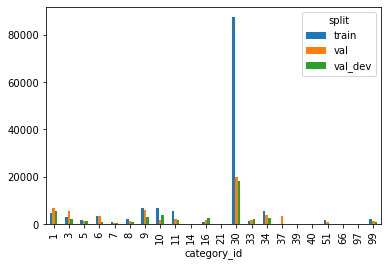

In [12]:
pd.crosstab(cct_images_labeled_split.category_id, cct_images_labeled_split.split).plot.bar()